<img src="https://thevalley.es/wp-content/uploads/2016/11/thevalley-logo-negro.png" width="400"></img>

# Breve introducción a algoritmos heurísticos


Los métodos heurísticos nos permiten resolver problemas complejos utilizando trucos o aproximaciones sencillas. En general estos métodos nos permiten llegar a soluciones óptimas o subóptimas con un adecuado nivel de calidad.

<img src="https://paleofoundation.com/wp-content/uploads/2019/06/Heuristics-Reducing-Consumer-Decision-Friction-1-1200x800_c.png" width="400"></img>


**Notebook por: David Rey**


# Algoritmo hill climbing

Para empezar con uno de los algoritmos heurísticos más sencillos aplicados a la optimización (buscar un máximo  o un mínimo en una función), trabajaremos sobre el algoritmo de **subida a la colina** o **hill climbing**.

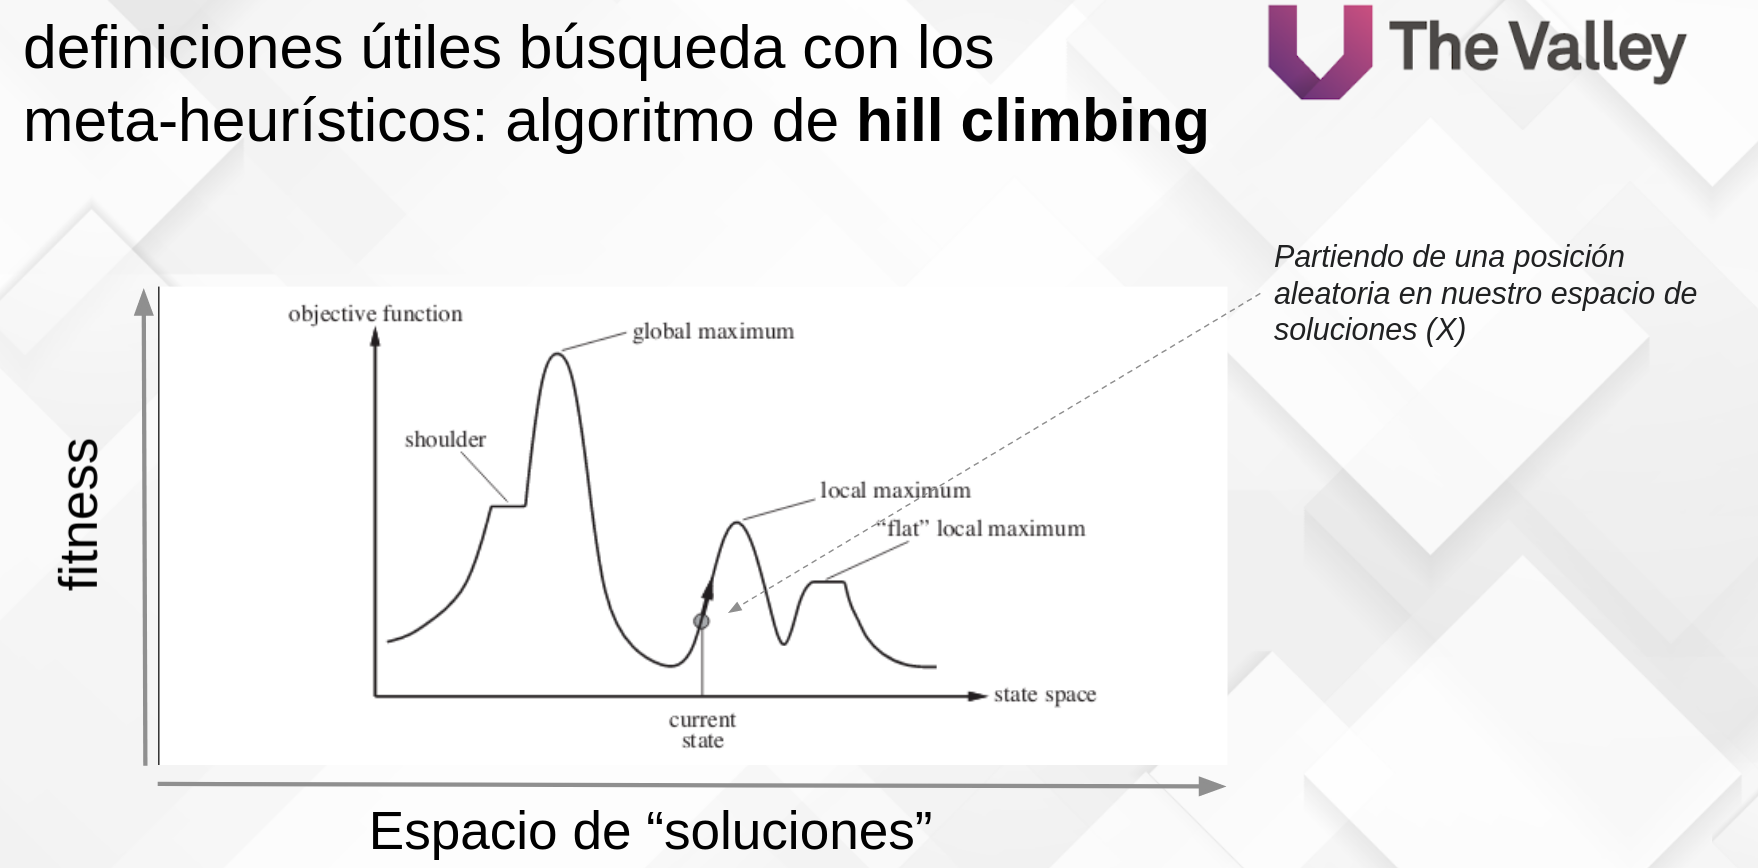

In [ ]:
# Cargamos librerías
import random
import numpy as np
import matplotlib.pyplot as plt

## Definición de la función a optimizar

Nuestra función a optimizar será:

 $f(x) = x^2$.

que como sabemos tiene su óptimo en el (0,0)

<img src="https://upload.wikimedia.org/wikipedia/commons/d/dd/Function_x%5E2.svg" width="300"></img>

El espacio de soluciones donde vamos a trabajar será entre x=-5 y x=+5

In [ ]:
#
# Definimos la función en código
#
def x_2(x):
	return x**2

## Definición de la función de fitness

También definiremos lo que llamamos una función de **fitness** (o calidad de la solución), esta función será sobre la que busquemos un mínimo o un máximo. En este caso tomamos el negativo del valor original.

In [ ]:
def min_fitness_function(y_value):
  result = -y_value
  return result

## Definición del espacio de búsqueda

Finalmente definimos cual es nuestro espacio de búsqueda

In [ ]:
#
# Definimos nuestro espacio de búsqueda de soluciones
#
search_space_bounds = [-5.0, 5.0]

## Definición de algoritmo de hill climbing

In [ ]:
#
# Definimos una función que busca un valor aleatorio dentro del rango de búsqueda
#
def random_start_point(search_space_bounds):
  point = search_space_bounds[0] + random.random()*(search_space_bounds[1] - search_space_bounds[0])
  return point

In [ ]:
#
# Establecemos la función objetivo
#
target_function = x_2
fitness_function = min_fitness_function

#
# Partimos de un punto inicial
#
current_position = random_start_point(search_space_bounds)
current_value = target_function(current_position)
fitness_value = fitness_function(current_value)

#
# Iteramos hasta que encontrar la cima de la colina
#
stop_criterium = False
success = False
iteration_count = 0
step_size = 0.05
positions = []
print('Start   (x=', str(current_position), ' y=' + str(current_value) + ') - Fitness:' + str(fitness_value) )
print('-----------------------')
while not stop_criterium:
  iteration_count += 1
  positions.append((current_position, current_value, fitness_value ))
  # Probamos a la derecha
  current_position_right = current_position + step_size
  current_value_right = target_function(current_position_right)
  fitness_value_right = fitness_function(current_value_right)

  # Probamos a la izquierda
  current_position_left = current_position - step_size
  current_value_left = target_function(current_position_left)
  fitness_value_left = fitness_function(current_value_left)

  if fitness_value_left > fitness_value_right:
    fitness_candidate = fitness_value_left
    current_position_candidate = current_position_left
    current_value_candidate = current_value_left
    dx =  -step_size
  else:
    fitness_candidate = fitness_value_right
    current_position_candidate = current_position_right
    current_value_candidate = current_value_right
    dx =  step_size
  #print(fitness_value)
  #print('f:' + str(fitness_candidate) + ' -> ' + str(current_position_candidate)+','+str(current_value_candidate))
  # Mejoramos nuestra posicion?, si es así actualizamos

  if fitness_candidate > fitness_value:

    fitness_value = fitness_candidate
    current_value = current_value_candidate
    current_position = current_position_candidate

    print('Iteration [' + str(iteration_count)+ ']  (x=', str(current_position), ' y=' + str(current_value) + ') - Fitness:' + str(fitness_value) + ' dx=' + str(dx))
  else:
    # Ya hemos encontrado la cima, paramos el proceso
    stop_criterium = True
    success = True

  if current_position_candidate < search_space_bounds[0] or current_position_candidate > search_space_bounds[1]:
    stop_criterium = True

print('-----------------------')
print('Total iterations [' + str(iteration_count)+ '] - Solution x=', str(current_position), ' y=' + str(current_value) + ' - Fitness:' + str(fitness_value) )
print('Found solution: ' + str(success))


Start   (x= -3.303539083246508  y=10.91337047453718) - Fitness:-10.91337047453718
-----------------------
Iteration [1]  (x= -3.2535390832465083  y=10.58551656621253) - Fitness:-10.58551656621253 dx=0.05
Iteration [2]  (x= -3.2035390832465085  y=10.26266265788788) - Fitness:-10.26266265788788 dx=0.05
Iteration [3]  (x= -3.1535390832465087  y=9.944808749563231) - Fitness:-9.944808749563231 dx=0.05
Iteration [4]  (x= -3.103539083246509  y=9.631954841238581) - Fitness:-9.631954841238581 dx=0.05
Iteration [5]  (x= -3.053539083246509  y=9.32410093291393) - Fitness:-9.32410093291393 dx=0.05
Iteration [6]  (x= -3.003539083246509  y=9.02124702458928) - Fitness:-9.02124702458928 dx=0.05
Iteration [7]  (x= -2.9535390832465094  y=8.723393116264631) - Fitness:-8.723393116264631 dx=0.05
Iteration [8]  (x= -2.9035390832465096  y=8.430539207939981) - Fitness:-8.430539207939981 dx=0.05
Iteration [9]  (x= -2.8535390832465097  y=8.142685299615332) - Fitness:-8.142685299615332 dx=0.05
Iteration [10]  (x=

Vemos que ha encontrado el mínimo de la función en (0,0), aproximadamente, vemos como no logramos un valor exacto, pero suficientemente bueno.

In [ ]:
#
# Mostramos los resultados (parte 1), generamos 100 valores de la función original
#
x_function = []
y_function = []
max_steps = 100
for i in range(0,max_steps):
  x = search_space_bounds[0]  + i * (search_space_bounds[1] - search_space_bounds[0])/max_steps
  y = target_function(x)
  x_function.append(x)
  y_function.append(y)

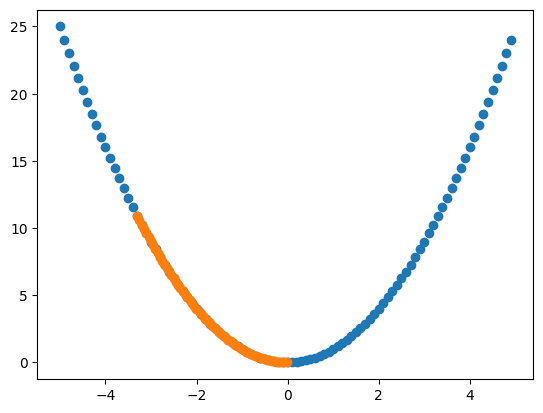

In [ ]:
#
# Usamos los resultados de la función original y la convergencia
#
x_values = [position[0] for position in positions]
y_values = [position[1] for position in positions]
fitness_values = [position[2] for position in positions]

#
# Mostramos las dos series
#
plt.scatter(x_function, y_function)
plt.scatter(x_values, y_values)

plt.show()

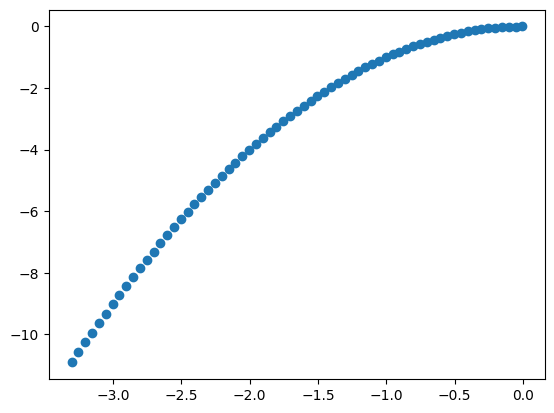

In [ ]:
#
# Mostramos la evolución de nuestra función de fitness
#
plt.scatter(x_values, fitness_values)
plt.show()

## Segundo ejemplo de hill climbing

Esta vez repetimos el proceso con una función un poco distinta

¿Cuál sería el mínimo y el máximo para la función?

$y = -2x^3 + 7 x^2 - 3 x$

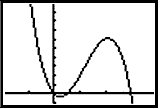

In [ ]:
def new_function(x):
  result = -2 * (x**3) + 7*(x**2) - 3*x
  return result

In [ ]:
# Definimos los bounds
search_space_bounds = [-2, 2]


### Búsqueda del mínimo


In [ ]:

#
# Establecemos la función objetivo
#
target_function = new_function
fitness_function = min_fitness_function

#
# Partimos de un punto inicial
#
current_position = random_start_point(search_space_bounds)
current_value = target_function(current_position)
fitness_value = fitness_function(current_value)

#
# Iteramos hasta que encontrar la cima de la colina
#
stop_criterium = False
success = False
iteration_count = 0
step_size = 0.05
positions = []
print('Start   (x=', str(current_position), ' y=' + str(current_value) + ') - Fitness:' + str(fitness_value) )
print('-----------------------')
while not stop_criterium:
  iteration_count += 1
  positions.append((current_position, current_value, fitness_value ))

  # Probamos a la derecha
  current_position_right = current_position + step_size
  current_value_right = target_function(current_position_right)
  fitness_value_right = fitness_function(current_value_right)

  # Probamos a la izquierda
  current_position_left = current_position - step_size
  current_value_left = target_function(current_position_left)
  fitness_value_left = fitness_function(current_value_left)

  if fitness_value_left > fitness_value_right:
    fitness_candidate = fitness_value_left
    current_position_candidate = current_position_left
    current_value_candidate = current_value_left
    dx =  -step_size
  else:
    fitness_candidate = fitness_value_right
    current_position_candidate = current_position_right
    current_value_candidate = current_value_right
    dx =  step_size
  #print(fitness_value)
  #print('f:' + str(fitness_candidate) + ' -> ' + str(current_position_candidate)+','+str(current_value_candidate))
  # Mejoramos nuestra posicion?, si es así actualizamos
  if fitness_candidate > fitness_value:

    fitness_value = fitness_candidate
    current_value = current_value_candidate
    current_position = current_position_candidate

    print('Iteration [' + str(iteration_count)+ ']  (x=', str(current_position), ' y=' + str(current_value) + ') - Fitness:' + str(fitness_value) + ' dx=' + str(dx))
  else:
    # Ya hemos encontrado la cima, paramos el proceso
    stop_criterium = True
    success = True

  if current_position_candidate < search_space_bounds[0] or current_position_candidate > search_space_bounds[1]:
    stop_criterium = True

print('-----------------------')
print('Total iterations [' + str(iteration_count)+ '] - Solution x=', str(current_position), ' y=' + str(current_value) + ' - Fitness:' + str(fitness_value) )
print('Found solution: ' + str(success))


Start   (x= -0.026431235358586047  y=0.08422090775520158) - Fitness:-0.08422090775520158
-----------------------
Iteration [1]  (x= 0.023568764641413956  y=-0.06684407152620415) - Fitness:0.06684407152620415 dx=0.05
Iteration [2]  (x= 0.07356876464141396  y=-0.18361611374685233) - Fitness:0.18361611374685233 dx=0.05
Iteration [3]  (x= 0.12356876464141396  y=-0.26759521890674287) - Fitness:0.26759521890674287 dx=0.05
Iteration [4]  (x= 0.17356876464141396  y=-0.32028138700587594) - Fitness:0.32028138700587594 dx=0.05
Iteration [5]  (x= 0.22356876464141395  y=-0.3431746180442513) - Fitness:0.3431746180442513 dx=0.05
-----------------------
Total iterations [6] - Solution x= 0.22356876464141395  y=-0.3431746180442513 - Fitness:0.3431746180442513
Found solution: True


In [ ]:
#
# Mostramos los resultados (parte 1), generamos 100 valores de la función original
#
x_function = []
y_function = []
max_steps = 100
for i in range(0,max_steps):
  x = search_space_bounds[0]  + i * (search_space_bounds[1] - search_space_bounds[0])/max_steps
  y = target_function(x)
  x_function.append(x)
  y_function.append(y)

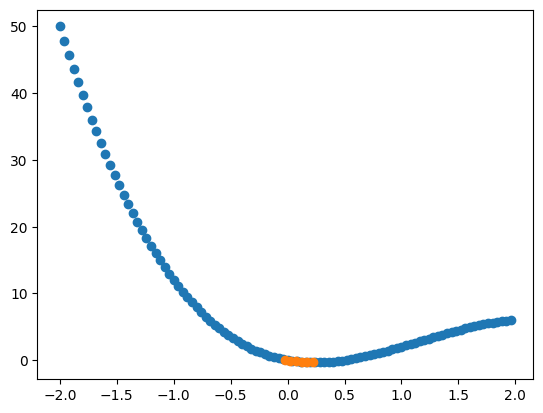

In [ ]:
#
# Usamos los resultados de la función original y la convergencia
#
x_values = [position[0] for position in positions]
y_values = [position[1] for position in positions]
fitness_values = [position[2] for position in positions]

#
# Mostramos las dos series
#
plt.scatter(x_function, y_function)
plt.scatter(x_values, y_values)

plt.show()

### Búsqueda de máximo



In [ ]:
# Nueva función de fitness
def max_fitness_function(y_value):
  result = y_value
  return result

In [ ]:
# Definimos los bounds
search_space_bounds = [-2, 3]


In [ ]:

#
# Establecemos la función objetivo
#
target_function = new_function
fitness_function = max_fitness_function

#
# Partimos de un punto inicial
#
current_position = random_start_point(search_space_bounds)
current_value = target_function(current_position)
fitness_value = fitness_function(current_value)

#
# Iteramos hasta que encontrar la cima de la colina
#
stop_criterium = False
success = False
iteration_count = 0
step_size = 0.1
positions = []
print('Start   (x=', str(current_position), ' y=' + str(current_value) + ') - Fitness:' + str(fitness_value) )
print('-----------------------')
while not stop_criterium:
  iteration_count += 1
  positions.append((current_position, current_value, fitness_value ))
  # Probamos a la derecha
  current_position_right = current_position + step_size
  current_value_right = target_function(current_position_right)
  fitness_value_right = fitness_function(current_value_right)

  # Probamos a la izquierda
  current_position_left = current_position - step_size
  current_value_left = target_function(current_position_left)
  fitness_value_left = fitness_function(current_value_left)

  if fitness_value_left > fitness_value_right:
    fitness_candidate = fitness_value_left
    current_position_candidate = current_position_left
    current_value_candidate = current_value_left
    dx =  -step_size
  else:
    fitness_candidate = fitness_value_right
    current_position_candidate = current_position_right
    current_value_candidate = current_value_right
    dx =  step_size
  #print(fitness_value)
  #print('f:' + str(fitness_candidate) + ' -> ' + str(current_position_candidate)+','+str(current_value_candidate))
  # Mejoramos nuestra posicion?, si es así actualizamos
  if fitness_candidate > fitness_value:

    fitness_value = fitness_candidate
    current_value = current_value_candidate
    current_position = current_position_candidate

    print('Iteration [' + str(iteration_count)+ ']  (x=', str(current_position), ' y=' + str(current_value) + ') - Fitness:' + str(fitness_value) + ' dx=' + str(dx))
  else:
    # Ya hemos encontrado la cima, paramos el proceso
    stop_criterium = True
    success = True

  if current_position_candidate < search_space_bounds[0] or current_position_candidate > search_space_bounds[1]:
    stop_criterium = True

print('-----------------------')
print('Total iterations [' + str(iteration_count)+ '] - Solution x=', str(current_position), ' y=' + str(current_value) + ' - Fitness:' + str(fitness_value) )
print('Found solution: ' + str(success))

Start   (x= -1.176238147249523  y=16.468203758848627) - Fitness:16.468203758848627
-----------------------
Iteration [1]  (x= -1.276238147249523  y=19.38763316125993) - Fitness:19.38763316125993 dx=-0.1
Iteration [2]  (x= -1.376238147249523  y=22.60021114134117) - Fitness:22.60021114134117 dx=-0.1
Iteration [3]  (x= -1.4762381472495232  y=26.11793769909236) - Fitness:26.11793769909236 dx=-0.1
Iteration [4]  (x= -1.5762381472495233  y=29.952812834513487) - Fitness:29.952812834513487 dx=-0.1
Iteration [5]  (x= -1.6762381472495234  y=34.116836547604564) - Fitness:34.116836547604564 dx=-0.1
Iteration [6]  (x= -1.7762381472495234  y=38.62200883836557) - Fitness:38.62200883836557 dx=-0.1
Iteration [7]  (x= -1.8762381472495235  y=43.48032970679654) - Fitness:43.48032970679654 dx=-0.1
Iteration [8]  (x= -1.9762381472495236  y=48.703799152897446) - Fitness:48.703799152897446 dx=-0.1
Iteration [9]  (x= -2.0762381472495237  y=54.304417176668295) - Fitness:54.304417176668295 dx=-0.1
--------------

In [ ]:
#
# Mostramos los resultados (parte 1), generamos 100 valores de la función original
#
x_function = []
y_function = []
max_steps = 100
for i in range(0,max_steps):
  x = search_space_bounds[0]  + i * (search_space_bounds[1] - search_space_bounds[0])/max_steps
  y = target_function(x)
  x_function.append(x)
  y_function.append(y)

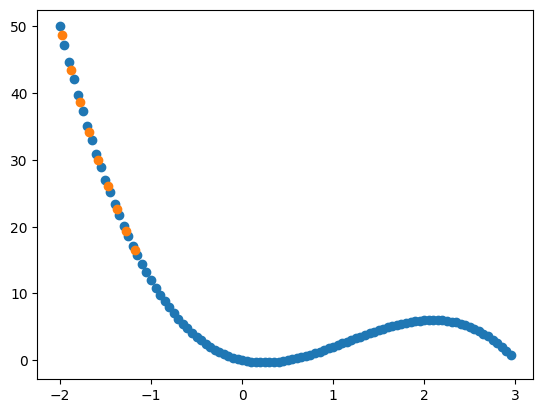

In [ ]:
#
# Usamos los resultados de la función original y la convergencia
#
x_values = [position[0] for position in positions]
y_values = [position[1] for position in positions]
fitness_values = [position[2] for position in positions]

#
# Mostramos las dos series
#
plt.scatter(x_function, y_function)
plt.scatter(x_values, y_values)

plt.show()

Solución:

here is a relative minimum value of -0.34 at approximately x = 0.24 and a relative maximum value of 6.05 at approximately x = 2.09.

# Ejercicio hill climbing y discusión

**Pregunta 1.** Con la función anterior ejecutar el proceso con un espacio de búsqueda de en x de [-5, +5], ¿qué se puede decir en este caso de la convergencia?

**Pregunta 2.** Con este mismo caso, vamos a cambiar el step size a 2 con un espacio de búsqueda de [-6, +6], ¿qué pasa con la solución que encontramos?

**Pregunta 3.**. ¿Cómo se os ocurre modificar de forma sencilla el algoritmo de hill climbing para solucionar los problemas de máximos y mínimos locales?